In [2]:
import os
from dotenv import load_dotenv

In [3]:
load_dotenv()

True

In [4]:
#os.getenv('OPENAI_API_KEY')

### OpenAI Chat API

In [5]:
import json
from openai import OpenAI

In [6]:
client = OpenAI()

In [7]:
response = client.chat.completions.create(
    model="gpt-3.5-turbo",
    max_tokens=50,
    n=1,
    temperature=0.5,
    messages=[
        {
            "role": "user",
            "content": "Who won first cricket worldcup?",
        }
    ]
)
response.choices[0].message.content

'The first cricket World Cup was won by the West Indies team in 1975.'

Check tokens calculation [https://platform.openai.com/tokenizer](https://platform.openai.com/tokenizer)

Check Pricing for tokens [https://openai.com/api/pricing/](https://openai.com/api/pricing/)

### Grammar correction

In [45]:
response = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {
      "role": "system",
      "content": "You will be provided with statements, and your task is to convert them to standard English."
    },
    {
      "role": "user",
      "content": "She no went to the market."
    }
  ],
  temperature=0.7,
  max_tokens=64,
)

response.choices[0].message.content

'She did not go to the market.'

### Emoji Translation

In [46]:
response = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {
      "role": "system",
      "content": "You will be provided with text, and your task is to translate it into emojis. Do not use any regular text. Do your best with emojis only."
    },
    {
      "role": "user",
      "content": "Artificial intelligence is a technology with great promise."
    }
  ],
  temperature=0.8,
  max_tokens=64,
)
print(response.choices[0].message.content)

🤖🧠👍


### Explain code

In [47]:
response = client.chat.completions.create(
  model="gpt-4",
  messages=[
    {
      "role": "system",
      "content": "You will be provided with a piece of code, and your task is to explain it in a concise way."
    },
    {
      "role": "user",
      "content": "build: image: python:alpine script: - python --version"
    }
  ],
  temperature=0.7,
  max_tokens=64,
)
print(response.choices[0].message.content)

This is a configuration for a CI/CD (Continuous Integration/Continuous Deployment) pipeline, possibly in a YAML file.

- `build:`: This is the build phase where the application is built in a specific environment.
- `image: python:alpine`: It specifies the Docker image to be used for the build


### Interview questions

In [48]:
response = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {
      "role": "user",
      "content": "Create a list of 5 questions for an interview with a Python Lead."
    }
  ],
  temperature=0.5,
  max_tokens=64,
)
print(response.choices[0].message.content)

1. Can you walk us through a recent project you led using Python? What were the key challenges you faced and how did you overcome them?
2. How do you approach mentoring and coaching junior developers in Python? Can you share a specific example of a successful mentoring experience?
3. In your opinion, what are the


### Image Explanation

#### Images are made available to the model in two main ways:
1) by passing a link to the image
2) by passing the base64 encoded image directly in the request. 

### Image as URL

In [56]:
image_url = "https://pixabay.com/get/gb79c4896f2f0b57f24f29cfce3202d92f974e75254687e901d77ef993b04cae84034106a23a09da7e30c5f63a8ffb2b965b00bc7ec09d4abf7fae65788b53210_1280.jpg"
from IPython.display import Image
Image(url= image_url, width=400)

In [50]:
prompt = [
            {
                "type": "text",
                "text": "Can you explain this image to me"
            }
        ]

image_content = {
                    "type": "image_url",
                    "image_url": { "url": image_url}
                }
prompt.append(image_content)

print(prompt)

[{'type': 'text', 'text': 'Can you explain this image to me'}, {'type': 'image_url', 'image_url': {'url': 'https://pixabay.com/get/gb79c4896f2f0b57f24f29cfce3202d92f974e75254687e901d77ef993b04cae84034106a23a09da7e30c5f63a8ffb2b965b00bc7ec09d4abf7fae65788b53210_1280.jpg'}}]


In [51]:
response = client.chat.completions.create(
  model="gpt-4o",
  messages=[
    {
      "role": "user",
      "content": prompt
    }
  ],
  temperature=0.5,
  max_tokens=64,
)
print(response.choices[0].message.content)

This image shows a close-up of a tabby cat with green eyes. The cat is resting on a brown surface, possibly a piece of furniture or a cat tree, with one of its front paws visible in the foreground. The background is plain and out of focus, which helps to emphasize the cat's face and its


### Image as base64 encoded

In [52]:
import base64
import requests

# encode the image
def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

# Path to your image
image_path = "data/image.jpeg"

# Getting the base64 string
base64_image = encode_image(image_path)

prompt = [
            {
                "type": "text",
                "text": "Can you explain this image to me"
            }
        ]

image_url = "https://pixabay.com/get/gb79c4896f2f0b57f24f29cfce3202d92f974e75254687e901d77ef993b04cae84034106a23a09da7e30c5f63a8ffb2b965b00bc7ec09d4abf7fae65788b53210_1280.jpg"
image_content = {
                    "type": "image_url",
                    "image_url": { "url": f"data:image/jpeg;base64,{base64_image}"}
                }
prompt.append(image_content)

#print(prompt)


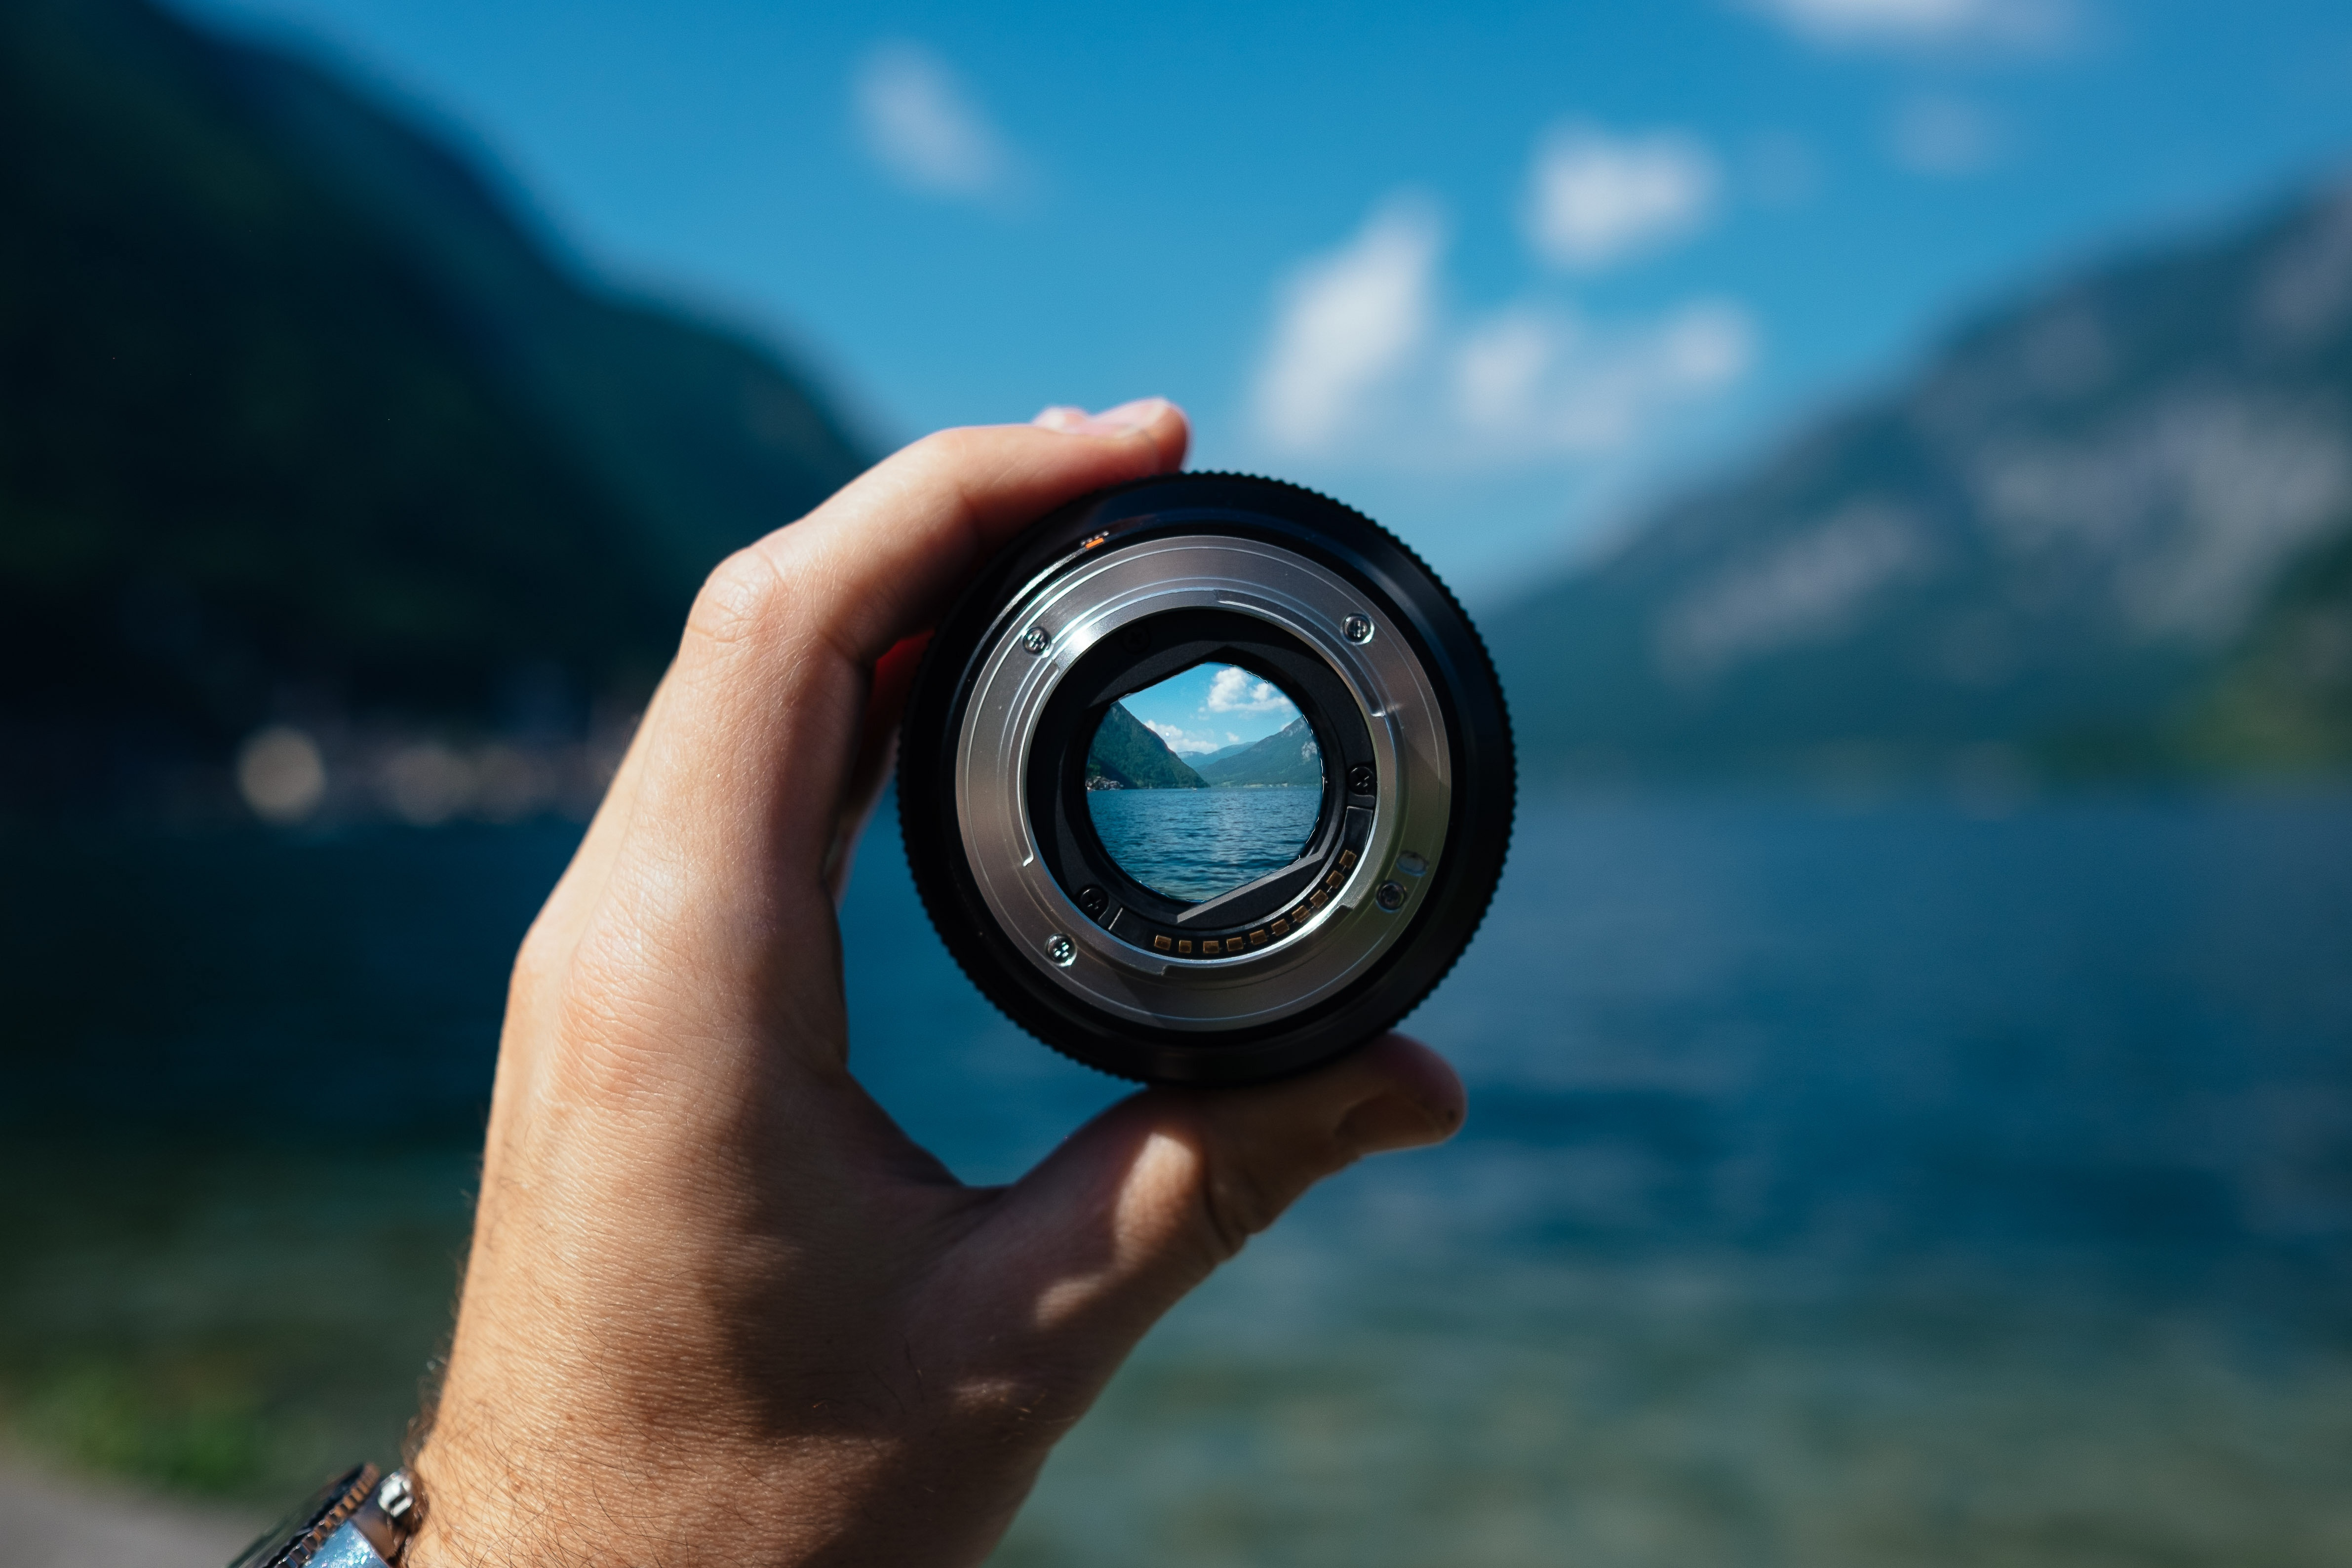

In [55]:
image_url = f"data:image/jpeg;base64,{base64_image}"
from IPython.display import Image 
Image(url= image_url, width=400)

In [54]:
response = client.chat.completions.create(
  model="gpt-4o",
  messages=[
    {
      "role": "user",
      "content": prompt
    }
  ],
  temperature=0.5,
  max_tokens=64,
)
print(response.choices[0].message.content)

This image depicts a hand holding a camera lens in front of a scenic background. The camera lens is being held such that the view through the lens shows a clear, focused image of a lake surrounded by mountains, with a bright blue sky and some clouds. The background outside the lens is blurred, creating a strong visual contrast


### Context Window

In [16]:
response = client.chat.completions.create(
    model="gpt-3.5-turbo",
    max_tokens=50,
    n=1,
    temperature=0.5,
    messages=[
        {
            "role": "user",
            "content": "Who won first cricket worldcup?",
        }
    ]
)
response.choices[0].message.content

'The West Indies won the first Cricket World Cup in 1975.'

In [17]:
response = client.chat.completions.create(
    model="gpt-3.5-turbo",
    max_tokens=50,
    n=1,
    temperature=0.5,
    messages=[
        {
            "role": "user",
            "content": "Who was the captain of winning team?",
        }
    ]
)
response.choices[0].message.content

'The captain of the winning team was [insert name of captain].'

#### That is why chat api accepts messages as list of messages to have more context

In [20]:
response = client.chat.completions.create(
    model="gpt-3.5-turbo",
    max_tokens=50,
    n=1,
    temperature=0.5,
    messages=[
        {
            "role": "user",
            "content": "Who won first cricket worldcup?",
        },
        {
            "role": "user",
            "content": "Who was the captain of winning team?",
        }
    ]
)
response.choices[0].message.content

'The West Indies won the first cricket World Cup in 1975. The captain of the winning team was Clive Lloyd.'

### Moderation - Flagging inappropriate content

In [28]:
response = client.moderations.create(input="i want to starve myself?")
response.results[0]

print("\nis Flagged: ", response.results[0].flagged, '\n')

for name, value in dict(response.results[0].categories).items():
    print(name, value)


is Flagged:  True 

harassment False
harassment_threatening False
hate False
hate_threatening False
self_harm True
self_harm_instructions False
self_harm_intent True
sexual False
sexual_minors False
violence False
violence_graphic False
self-harm True
sexual/minors False
hate/threatening False
violence/graphic False
self-harm/intent True
self-harm/instructions False
harassment/threatening False


In [29]:
response = client.moderations.create(input="How to make some explosive chemicals?")
response.results[0]

print("\nis Flagged: ", response.results[0].flagged, '\n')

for name, value in dict(response.results[0].categories).items():
    print(name, value)


is Flagged:  False 

harassment False
harassment_threatening False
hate False
hate_threatening False
self_harm False
self_harm_instructions False
self_harm_intent False
sexual False
sexual_minors False
violence False
violence_graphic False
self-harm False
sexual/minors False
hate/threatening False
violence/graphic False
self-harm/intent False
self-harm/instructions False
harassment/threatening False


### Text to Image

In [57]:
response = client.images.generate(
  model="dall-e-2",
  prompt="a white siamese cat",
  size="256x256",
  quality="standard",
  n=1,
)

image_url = response.data[0].url
from IPython.display import Image
Image(url= image_url)

##### The size of the generated images. Must be one of 256x256 , 512x512 , or 1024x1024 for dall-e-2 . Must be one of 1024x1024 , 1792x1024 , or 1024x1792 for dall-e-3 models